# **Speech Command Recognition with torchaudio**
******************************************
**점수관련**  
본 프로젝트는 Character Error Rate(CER) 점수와 보고서를 성적에 반영할 예정입니다. 평가 항목은 아래와 같습니다. 

A. 결과 (40%)
- Metric 성능 :(이미지 분류 - 정확도 / **음성인식 - 글자별 오류율**)

B. 신규성 (30%)
- Network 변경 내용 (이미지 분류 - 의무 / **음성인식 - 선택**)
- 성능 개선 및 overfitting 방지 시도

C. 이론적 근거 (20%)
- 기존 baseline과의 차별점 
- 성능 개선을 위한 시도와 이유

D. 보고서 완성도 (10%)

******************************************
**보고서**
1. 연구 목적
2. 모델 구조
3. 실험 내용
4. 실험 결과
5. 고찰 및 결론
6. Colab 파일 (동작 가능여부)

제출하실 파일은 **주피터 노트북 파일**('.ipynb' : 파일>다운로드)과 **결과 보고서**(pdf)입니다.

******************************************
**제출 시 유의사항**
1. 테스트 데이터셋을 사용할 경우 0점
2. 코랩 실행버튼만 눌렀을 때 실행되지 않을 경우 0점

******************************************
**코드 검증**  
코드 검증 시, Speech Command 데이터셋에서 제공하는 시험 데이터 리스트로 최종 CER을 검사할 예정입니다. 보내주신 코드를 재생하여 보고서의 결과와 일치하는 지 확인할 예정입니다. 이때, train/val/test 데이터는 처음 나눠드린 것과 같이 고정입니다. 다만, 데이터 개수를 늘리기 위해 train과 val을 합쳐 훈련하는 것 까지는 가능합니다. (**test 데이터 셋은 훈련때 사용 불가**) 이 경우 제출 시 따로 표기 부탁드립니다. 

또한 Random 라이브러리 사용시에 seed 고정하는 등 재현을 고려하시고 코딩부탁드립니다. 
******************************************
**GPU 사용 법**  
런타임 > 런타임 유형 변경 > 하드웨어 가속기에서 GPU를 선택하면 GPU를 사용 할 수 있습니다.  
******************************************
**Colab 사용시 유의사항**  
1. 12시간 단위로 가상머신을 사용할 수 있고 12시간이 지나면 모든 파일과 작업로그들이 초기화 됩니다. 또한, 12시간 넘게 GPU를 사용하기는 어려우니 일찍 시작하셔서 틈틈히 실험해보시는 것을 추천드립니다.
2. 코드가 길기 때문에 스크롤 보다는 목차를 사용해서 이동하는 것을 추천드립니다.


******************************************
**QnA**
1. 베이스라인 말고 다른 모델 써도 상관없나요?  
  --> 네 가능합니다!

2. CER이 1이 넘으면 어떻게 되는건가요? overfiiting 됬다는건가요?  
 --> 오버피팅은 모델이 훈련데이터셋에 너무 학습이 되었다는 뜻입니다. 훈련데이터에 대한 정확도에 비해 검증 데이터에 대한 정확도가 차이가 나는 경우를 말합니다. CER이 1이 넘었다는 것은 목표 문장과 추론한 문장이 완전히 다르다는 뜻입니다.

3. 데이터는 주어진 것으로만 활용해야하는 거죠?  
 --> 네 데이터는 주어진 것만 활용하셔야 하고, **pre trained model도 사용하시면 안됩니다.**

4. 개인적으로 사용가능한 GPU에서 수행하고 .ipynb 파일로 제출해도 되나요?  
 --> 네 가능합니다. 다만, 코랩에서 코드 검증을 할 예정이니 이 부분을 주의해주세요. (가상 머신 사용 시간, 용량 등)

5. 채점 시 training 수치와 실험했던 수치가 다르면 어떻게 되는 건가요?   
 --> 차이가 많이 나올 경우에만 좋지 않은 경우(CER이 높은 것)로 채점을 할 예정입니다. 수치가 약간씩 다른 것은 자연스러운 일이니 너무 걱정마세요!

6. 음성 인식은 따로 전처리 기법이 존재할까요?  
 --> 음성인식에서는 스크립트를 전처리 하기도 하고요(공백을 제거하거나, 이상한 글자를 제거하거나.), 이미지에서와 비슷한 SpecAugment라는 스펙트로그램 이미지 전처리 기법이 있습니다. 스크립트를 전처리하시는 경우 연결 방법과 함께 전처리한 파일이나 코드를 함께 첨부해주세요.



In [ ]:
%matplotlib inline

# Configuration

Tip. 처음 접하시는 분들은 Configuration의 파라미터들을 위주로 공부해보시고 값을 바꾸는 것 부터 시작하는 것을 추천드립니다. 

In [ ]:
class Condfiguration():
   def __init__(self):

      self.seed = 1234                # random seed

      #hyperparameter
      self.hidden_size = 256           # hidden size of model 
      self.layer_size = 1              # number of layers of model
      self.dropout = 0.2               # dropout rate in training
      self.bidirectional = False       # use bidirectional RNN for encoder
      self.use_attention = False       # use attention between encoder-decoder
      self.rnn_cell = 'gru'            # GRU/LSTM

      self.batch_size = 16            # batch size in training
      self.lr = 1e-01                 # learning rate
      self.teacher_forcing = 0.9      # teacher forcing ratio in decoder
      self.max_len = 8                # maximum characters of sentence

      # Audio 
      self.sample_rate = 16000
      self.n_fft=320
      self.hop_length = 320 
      self.win_length = 320
      self.power = 1

      # label
      self.SOS_token = 0
      self.EOS_token = 0
      self.PAD_token = 0
      self.char2index ={}
      self.index2char ={}

      self.min_epoch = 0
      self.max_epoch = 1

config = Condfiguration()

# Libraries 

In [ ]:
# GPU:
!pip install torch==1.7.0+cu101 torchvision==0.8.1+cu101 torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html
!pip install python-Levenshtein
!pip install wavio

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.3 MB 23 kB/s 
     |████████████████████████████████| 12.7 MB 167 kB/s 
     |████████████████████████████████| 7.6 MB 3.6 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu111
    Uninstalling torchvision-0.10.0+cu111:
      Successfully uninstalled torchvision-0.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.7.0+cu101 which is incompatible.
     |████████████████████████████████| 50 kB 2.5 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2

In [ ]:
#-*- coding: utf-8 -*-

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torchaudio
from torch.utils.data import Dataset, DataLoader

import torch.optim as optim
import torch.optim as optim
import Levenshtein as Lev 

import sys
import os
import random

import numpy as np
import librosa
import scipy.signal
import wavio
import wave
import math
import time

import matplotlib.pyplot as plt
import IPython.display as ipd
from tqdm.notebook import tqdm


if torch.cuda.is_available():
    import torch.cuda as device
else:
    import torch as device


/usr/local/lib/python3.7/dist-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


# Dataset

## importing dataset

이번 프로젝트에서 사용하는 데이터 셋은 `SpeechCommands <https://arxiv.org/abs/1804.03209>`입니다. 35개의 1초 길이(16kHz,16000 time frames)의 발화 명령으로 이루어져 있습니다.

torchaudio가 데이터 로딩과 벡터로의 변환을 담당합니다. 직접 오디오 파일을 받고 싶다면, ``torchaudio.load()`` 를 사용하면 됩니다. 

아래는 데이터 셋을 훈련 데이터, 평가 데이터, 시험 데이터로 나누는 코드 입니다. CER 점수는 시험 데이터(test_set)로만 반영합니다. 
  

In [ ]:
from torchaudio.datasets import SPEECHCOMMANDS
import os


class SubsetSC(SPEECHCOMMANDS):
    def __init__(self, subset: str = None):
        super().__init__("./", download=True)

        def load_list(filename):
            filepath = os.path.join(self._path, filename)
            with open(filepath) as fileobj:
                return [os.path.join(self._path, line.strip()) for line in fileobj]


        if subset == "validation":
            self._walker = load_list("validation_list.txt")

        elif subset == "testing":
            self._walker = load_list("testing_list.txt")

        elif subset == "training":
            excludes = load_list("validation_list.txt") + load_list("testing_list.txt") # 이거 빼고 다 훈련 데이터 셋!
            excludes = set(excludes)
            self._walker = [w for w in self._walker if w not in excludes]


# 데이터 셋 생성
train_set = SubsetSC("training")        # 훈련용
valid_set = SubsetSC("validation") # 파라미터 조정용 
test_set = SubsetSC("testing")          # 최종 평가

# 데이터 셋 길이 
print("training set : ",len(train_set),"\nvalidation set : ",len(valid_set),"\ntest set : ",len(test_set))

# 데이터 정보 저장 
waveform, sample_rate, *_ = train_set[0]

  0%|          | 0.00/2.26G [00:00<?, ?B/s]

training set :  84843 
validation set :  9981 
test set :  11005


In [ ]:
print(train_set[0])

(tensor([[-0.0658, -0.0709, -0.0753,  ..., -0.0700, -0.0731, -0.0704]]), 16000, 'backward', '0165e0e8', 0)


### 데이터 정보 확인

Shape of waveform: torch.Size([1, 13653])
Sample rate of waveform: 16000
Label: backward
speaker_id: 0e8ec1cb
utterance_number: 0


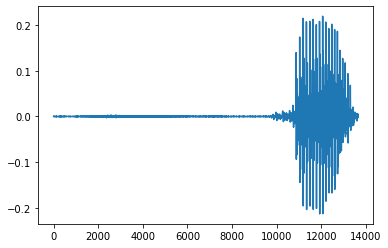

In [ ]:
# 데이터 정보 확인
waveform_, sample_rate_, label_, speaker_id_, utterance_number_ = train_set[66]
print("Shape of waveform: {}".format(waveform_.size()))
print("Sample rate of waveform: {}".format(sample_rate_))
print("Label: {}".format(label_))
print("speaker_id: {}".format(speaker_id_))
print("utterance_number: {}".format(utterance_number_))
plt.plot(waveform_.t().numpy());

스펙트로그램으로의 변환 확인

(161, 43)


/usr/local/lib/python3.7/dist-packages/torch/functional.py:516: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:653.)
  normalized, onesided, return_complex)
/usr/local/lib/python3.7/dist-packages/torch/functional.py:516: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:590.)
  normalized, onesided, return_complex)


<function matplotlib.pyplot.imshow>

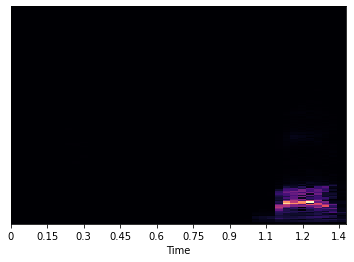

In [ ]:
import librosa.display

window= torch.hamming_window(config.hop_length, periodic=True, alpha=0.54, beta=0.46, dtype=None, layout=torch.strided, device=None, requires_grad=False)
spect = torchaudio.functional.spectrogram(waveform=waveform_, pad=0, window=window, n_fft=config.n_fft, hop_length=config.hop_length, win_length=config.win_length, power=1, normalized=True) 

audio_features = spect.numpy()
print(audio_features[0].shape)

librosa.display.specshow(audio_features[0], sr= 16000 , x_axis='time', y_axis=None)
plt.imshow

### label 확인

In [ ]:
labels = sorted(list(set(datapoint[2] for datapoint in train_set)))
print(labels)
print("전레 라벨 개수 >> ", len(labels))

['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero']
전레 라벨 개수 >>  35


### 오디오 들어보기

In [ ]:
# 데이터 셋의 가장 처음 오디오
waveform_first, _, label_first, *_ = train_set[10]
print(label_first)
ipd.Audio(waveform_first.numpy(), rate=sample_rate)

backward


## Tockenizing

학습을 위해서는 라벨을 모두 숫자로 바꿔야 합니다. 라벨에 쓰이는 모든 글자들을 모아서 숫자에 대응 시키는 과정을 Tockenizing 이라고 합니다. 아래 `load_label`은 Tockenizing 후 인덱스와 텍스트로 변환이 가능하도록 하는 딕셔너리를 반환합니다. 

In [ ]:
def sort_target(x):
    return x[1]

def load_label(label_list):
    char2index = {'<pad>':0, '<unk>':1, '<sos>':2, '<eos>':3}
    index2char = {0:'<pad>', 1:'<unk>', 2:'<sos>', 3:'<eos>'}
    char_count = {}

    print(label_list)

    for label in tqdm(label_list): # 리스트에서 라벨 하나 받기

        for char in label:        # 받은 라벨에서 글자 하나 받기 
            try:                  # 이전에 이미 진행한 글자인 경우 count, 처음 진행하는 경우 오류 발생하여 except으로 이동
                char_count[char] += 1

            except:               # 처음 받는 글자의 경우, 초기화 
                char_count[char] = 1

    # 글자 많이 나온 순서대로 sort
    char_count = dict(sorted(char_count.items(), key=sort_target, reverse=True))

    # 저장된 순서대로 인덱스 부여
    for i, char in enumerate(list(char_count.keys())):
        char2index[char]=i+4
        index2char[i+4]=char

    return char2index, index2char

char2index, index2char =load_label(labels)

config.char2index =char2index
config.index2char =index2char

config.SOS_token = char2index['<sos>']
config.EOS_token = char2index['<eos>']
config.PAD_token = char2index['<pad>']

label_length = len(index2char) # 출력 길이 

print("char2index",config.char2index)
print("index2char",config.index2char)

['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero']


  0%|          | 0/35 [00:00<?, ?it/s]

char2index {'<pad>': 0, '<unk>': 1, '<sos>': 2, '<eos>': 3, 'e': 4, 'o': 5, 'r': 6, 'a': 7, 'i': 8, 'n': 9, 't': 10, 'w': 11, 'f': 12, 's': 13, 'd': 14, 'h': 15, 'l': 16, 'g': 17, 'v': 18, 'u': 19, 'p': 20, 'b': 21, 'c': 22, 'y': 23, 'k': 24, 'm': 25, 'x': 26, 'z': 27}
index2char {0: '<pad>', 1: '<unk>', 2: '<sos>', 3: '<eos>', 4: 'e', 5: 'o', 6: 'r', 7: 'a', 8: 'i', 9: 'n', 10: 't', 11: 'w', 12: 'f', 13: 's', 14: 'd', 15: 'h', 16: 'l', 17: 'g', 18: 'v', 19: 'u', 20: 'p', 21: 'b', 22: 'c', 23: 'y', 24: 'k', 25: 'm', 26: 'x', 27: 'z'}


In [ ]:
print(config.char2index['a'])

7


## label to string 


In [ ]:
#label_to_string
def label_to_string(labels):
    if len(labels.shape) == 1:
        sent = str()
        for i in labels:
            if i.item() == config.EOS_token:
                break
            sent += config.index2char[i.item()]
        return sent

    elif len(labels.shape) == 2:
        sents = list()
        for i in labels:
            sent = str()
            for j in i:
                if j.item() == config.EOS_token:
                    break
                sent += config.index2char[j.item()]
            sents.append(sent)

        return sents

## CER계산

In [ ]:
def char_distance(ref, hyp):
    ref = ref.replace(' ', '') 
    hyp = hyp.replace(' ', '') 

    dist = Lev.distance(hyp, ref)
    length = len(ref.replace(' ', ''))

    return dist, length 

def get_distance(ref_labels, hyp_labels):
    total_dist = 0
    total_length = 0
    for i in range(len(ref_labels)):
        ref = label_to_string(ref_labels[i])
        hyp = label_to_string(hyp_labels[i])
        dist, length = char_distance(ref, hyp)
        total_dist += dist
        total_length += length 

    return total_dist, total_length

# Data Loader

In [ ]:
#-------------------------- Dataset --------------------------
class SpectrogramDataset(Dataset):
    def __init__(self, dataset, max_len, sos_id, eos_id, char2index, normalize=False, SAflag = False, mode='train',):
        super(SpectrogramDataset, self).__init__()
        """
        Dataset loads data from a list contatining wav_name, transcripts, speaker_id by dictionary.
        :param audio_conf: Dictionary containing the sample rate, window and the window length/stride in seconds.
        :param data_list: List of dictionary. key : "wav", "text", "speaker_id"
        :param char2index: Dictionary mapping character to index value.
        :param sos_id: Start token index.
        :param eos_id: End token index.
        :param normalize: Normalized by instance-wise standardazation.
        """

        self.dataset = dataset
        self.size = len(dataset)
        self.char2index = char2index
        self.sos_id = sos_id
        self.eos_id = eos_id
        self.PAD = 0
        self.normalize = normalize
        self.SAflag = SAflag
        self.max_len = config.max_len

        # 데이터 경로에 대한 파라미터 
        self.mode = mode

    def __getitem__(self, index):
        waveform, _, label, _, _ = self.dataset[index]
        
        spect = self.parse_audio(waveform)

        if self.mode == 'train':
            target = self.get_tockens(label)
            #print(spect, target)
            return spect, target

        else:
            return spect, None

    def get_tockens(self,label):
        target = [0] * (config.max_len + 2)

        target[0] = self.char2index['<sos>']                # 문장 시작에 시작 토큰 
        for i, c in enumerate(label):
            if i == config.max_len:                     # 최대 길이를 넘으면 나가기, 말그대로 라벨의 최대 길이이므로 넘을 이유가 없음
                break
            target[i + 1] = self.char2index[c]

        target[i + 2] = self.char2index['<eos>']       # 문장 끝에 끝 토큰 
        return target

        
    def parse_audio(self, waveform_):
        window= torch.hamming_window(config.win_length,
                                     periodic=True, 
                                     alpha=0.54, 
                                     beta=0.46, 
                                     dtype=None, 
                                     layout=torch.strided, 
                                     device=None,
                                     requires_grad=False)
        
        spect = torchaudio.functional.spectrogram(waveform=waveform_, 
                                                  pad=0,
                                                  window=window, 
                                                  n_fft=config.n_fft, 
                                                  hop_length=config.hop_length, 
                                                  win_length=config.win_length, 
                                                  power=config.power, 
                                                  normalized=True) 
        
        audio_features = spect.numpy()
        
        spect = torch.FloatTensor(audio_features[0]) #(161, 51)
        return spect

    def __len__(self):
        return self.size

#-------------------------- _collate_fn --------------------------
def _collate_fn(batch):
    def seq_length_(p):
        return p[0].size(1)
    def target_length_(p):
        return len(p[1])

    batch = sorted(batch, key=lambda sample: sample[0].size(1), reverse=True)
    seq_lengths    = [s[0].size(1) for s in batch]
    target_lengths = [len(s[1]) for s in batch]

    max_seq_size = max(seq_lengths)
    max_target_size = max(target_lengths)

    feat_size = batch[0][0].size(0)
    batch_size = len(batch)

    seqs = torch.zeros(batch_size, feat_size, max_seq_size)  #torch.zeros(batch_size, 1, feat_size, max_seq_size)
    #print("seqs.shape",seqs.shape) # [16, 1, 161, 51] -> [16, 161, 51]
    targets = torch.zeros(batch_size, max_target_size).to(torch.long)

    for x in range(batch_size):
        sample = batch[x]
        tensor = sample[0] # torch.Size([161, 51])
        target = sample[1]  
        seq_length = tensor.size(1) #161
        seqs[x].narrow(1, 0, seq_length).copy_(tensor) # 배치 길이에 맞춰서 내용 복사 torch.Size([16, 161, 51])
        targets[x].narrow(0, 0, len(target)).copy_(torch.LongTensor(target))

    seq_lengths = torch.IntTensor(seq_lengths)
    return seqs, targets, seq_lengths, target_lengths


#-------------------------- Dataloader --------------------------
class AudioDataLoader(DataLoader):
    def __init__(self, *args, **kwargs):
        super(AudioDataLoader, self).__init__(*args, **kwargs)
        self.collate_fn = _collate_fn


# Models

## baseRNN


In [ ]:
class BaseRNN(nn.Module):
    r"""
    Applies a multi-layer RNN to an input sequence.
    Note:
        Do not use this class directly, use one of the sub classes.
    Args:
        vocab_size (int): size of the vocabulary
        max_len (int): maximum allowed length for the sequence to be processed
        hidden_size (int): number of features in the hidden state `h`
        input_dropout_p (float): dropout probability for the input sequence
        dropout_p (float): dropout probability for the output sequence
        n_layers (int): number of recurrent layers
        rnn_cell (str): type of RNN cell (Eg. 'LSTM' , 'GRU')

    Inputs: ``*args``, ``**kwargs``
        - ``*args``: variable length argument list.
        - ``**kwargs``: arbitrary keyword arguments.

    Attributes:
        SYM_MASK: masking symbol
        SYM_EOS: end-of-sequence symbol
    """
    SYM_MASK = "MASK"
    SYM_EOS = "EOS"

    def __init__(self, vocab_size, max_len, hidden_size, input_dropout_p, dropout_p, n_layers, rnn_cell):
        super(BaseRNN, self).__init__() # Module(BaseRNN, self).__init__()
        # RNN자체를 위한 기본 정보 : RNN을 상속받는 DecoderRNN과, EncoderRNN이 포함할 데이터
        #                       나아가 seq2seq를 통해 생성된 모델이 가지고 있을 데이터

        self.vocab_size = vocab_size
        self.max_len = max_len
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        self.input_dropout_p = input_dropout_p
        self.input_dropout = nn.Dropout(p=input_dropout_p)

        if rnn_cell.lower() == 'lstm':
            self.rnn_cell = nn.LSTM # LSTM : 출력, 입력, 삭제 게이트
        elif rnn_cell.lower() == 'gru':
            self.rnn_cell = nn.GRU # GRU : 업데이트,리셋 게이트
        else:
            raise ValueError("Unsupported RNN Cell: {0}".format(rnn_cell))

        self.dropout_p = dropout_p

    def forward(self, *args, **kwargs):

        raise NotImplementedError()

## Encoder


In [ ]:
class EncoderRNN(BaseRNN):
    r"""
    Applies a multi-layer RNN to an input sequence.

    Args:
        vocab_size (int): size of the vocabulary
        max_len (int): a maximum allowed length for the sequence to be processed
        hidden_size (int): the number of features in the hidden state `h`
        input_dropout_p (float, optional): dropout probability for the input sequence (default: 0)
        dropout_p (float, optional): dropout probability for the output sequence (default: 0)
        n_layers (int, optional): number of recurrent layers (default: 1)
        bidirectional (bool, optional): if True, becomes a bidirectional encodr (defulat False)
        rnn_cell (str, optional): type of RNN cell (default: gru)
        variable_lengths (bool, optional): if use variable length RNN (default: False)
        embedding (torch.Tensor, optional): Pre-trained embedding.  The size of the tensor has to match
            the size of the embedding parameter: (vocab_size, hidden_size).  The embedding layer would be initialized
            with the tensor if provided (default: None).
        update_embedding (bool, optional): If the embedding should be updated during training (default: False).

    Inputs: inputs, input_lengths
        - **inputs**: list of sequences, whose length is the batch size and within which each sequence is a list of token IDs.
        - **input_lengths** (list of int, optional): list that contains the lengths of sequences
            in the mini-batch, it must be provided when using variable length RNN (default: `None`)

    Outputs: output, hidden
        - **output** (batch, seq_len, hidden_size): tensor containing the encoded features of the input sequence
        - **hidden** (num_layers * num_directions, batch, hidden_size): tensor containing the features in the hidden state `h`

    Examples::

         >>> encoder = EncoderRNN(input_vocab, max_seq_length, hidden_size)
         >>> output, hidden = encoder(input)

    """

    def __init__(self, feature_size, hidden_size,
                 input_dropout_p=0, dropout_p=0,
                 n_layers=1, bidirectional=False, rnn_cell='gru', variable_lengths=False):
        super(EncoderRNN, self).__init__(0, 0, hidden_size,
                input_dropout_p, dropout_p, n_layers, rnn_cell)

        self.variable_lengths = variable_lengths

        """
        Copied from https://github.com/SeanNaren/deepspeech.pytorch/blob/master/model.py
        Copyright (c) 2017 Sean Naren
        MIT License
        """
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=(41, 11), stride=(2, 2), padding=(20, 5)), # conv2d
            nn.BatchNorm2d(32), # BatchNorm2d 
            nn.Hardtanh(0, 20, inplace=True), # Hardtanh
            nn.Conv2d(32, 32, kernel_size=(21, 11), stride=(2, 1), padding=(10, 5)),
            nn.BatchNorm2d(32),
            nn.Hardtanh(0, 20, inplace=True)
        )
        


        feature_size = math.ceil((feature_size - 11 + 1 + (5*2)) / 2) 
        feature_size = math.ceil(feature_size - 11 + 1 + (5*2)) 
        feature_size *= 32 

        self.rnn = self.rnn_cell(feature_size, hidden_size, n_layers,
                                 batch_first=True, bidirectional=bidirectional, dropout=dropout_p)

    def forward(self, input_var, input_lengths=None):
        """
        Applies a multi-layer RNN to an input sequence.

        Args:
            input_var (batch, seq_len): tensor containing the features of the input sequence.
            input_lengths (list of int, optional): A list that contains the lengths of sequences
              in the mini-batch

        Returns: output, hidden
            - **output** (batch, seq_len, hidden_size): variable containing the encoded features of the input sequence
            - **hidden** (num_layers * num_directions, batch, hidden_size): variable containing the features in the hidden state h
        """

        input_var = input_var.unsqueeze(1) # torch.Size([16, 1, 161, 51])
        x = self.conv(input_var)

        x = x.transpose(1, 2)
        x = x.contiguous()
        sizes = x.size()
        x = x.view(sizes[0], sizes[1], sizes[2] * sizes[3])

        if self.training:
            self.rnn.flatten_parameters()

        output, hidden = self.rnn(x)

        return output, hidden


## Attention

In [ ]:
class Attention(nn.Module):
    r"""
    Applies an attention mechanism on the output features from the decoder.

    .. math::
            \begin{array}{ll}
            x = context*output \\
            attn = exp(x_i) / sum_j exp(x_j) \\
            output = \tanh(w * (attn * context) + b * output)
            \end{array}

    Args:
        dim(int): The number of expected features in the output

    Inputs: output, context
        - **output** (batch, output_len, dimensions): tensor containing the output features from the decoder.
        - **context** (batch, input_len, dimensions): tensor containing features of the encoded input sequence.

    Outputs: output, attn
        - **output** (batch, output_len, dimensions): tensor containing the attended output features from the decoder.
        - **attn** (batch, output_len, input_len): tensor containing attention weights.

    Attributes:
        linear_out (torch.nn.Linear): applies a linear transformation to the incoming data: :math:`y = Ax + b`.
        mask (torch.Tensor, optional): applies a :math:`-inf` to the indices specified in the `Tensor`.

    Examples::

         >>> attention = seq2seq.models.Attention(256)
         >>> context = Variable(torch.randn(5, 3, 256))
         >>> output = Variable(torch.randn(5, 5, 256))
         >>> output, attn = attention(output, context)

    """

    #Decoder에서 받은 hidden_size가 dim
    def __init__(self, dim):
        super(Attention, self).__init__()   
        self.linear_out = nn.Linear(dim*2, dim)
        self.mask = None

    def set_mask(self, mask):
        """
        Sets indices to be masked

        Args:
            mask (torch.Tensor): tensor containing indices to be masked
        """
        self.mask = mask

    def forward(self, output, context):
        # output    : rnn의 output(t에서 게이트를 거친 ht)
        #  (batch, out_len, dim)
        # context   : 인코더의 output - hs
        #  (batch, in_len, dim)
        batch_size = output.size(0)
        hidden_size = output.size(2) #dim = hidden size = 글자(단어)를 표현하는 고정길이 벡터
        input_size = context.size(1)

        ### hs dot ht = s
        attn = torch.bmm(output, context.transpose(1, 2))
        # (batch, out_len, dim) * (batch, in_len, dim) -> (batch, out_len, in_len)
        if self.mask is not None:
            attn.data.masked_fill_(self.mask, -float('inf'))

        ### s -> a  : (batch, out_len, in_len)
        attn = F.softmax(attn.view(-1, input_size), dim=1).view(batch_size, -1, input_size)

        ###
        # (batch, out_len, in_len) * (batch, in_len, dim) -> (batch, out_len, dim)
        mix = torch.bmm(attn, context)

        # concat -> (batch, out_len, 2*dim)
        # mix : (batch, out_len, dim)
        # out : (batch, out_len, dim)
        combined = torch.cat((mix, output), dim=2)

        # output -> (batch, out_len, dim)
        output = torch.tanh(self.linear_out(combined.view(-1, 2 * hidden_size))).view(batch_size, -1, hidden_size)

        return output, attn


## Decoder RNN

In [ ]:
class DecoderRNN(BaseRNN):
    KEY_ATTN_SCORE = 'attention_score'
    KEY_LENGTH = 'length'
    KEY_SEQUENCE = 'sequence'

    def __init__(self, vocab_size, max_len, hidden_size,
            sos_id, eos_id,
            n_layers=1, rnn_cell='gru', bidirectional=False,
            input_dropout_p=0, dropout_p=0, use_attention=False):
        super(DecoderRNN, self).__init__(vocab_size, max_len, hidden_size,
                input_dropout_p, dropout_p,
                n_layers, rnn_cell)

        self.bidirectional_encoder = bidirectional
        self.rnn = self.rnn_cell(hidden_size, hidden_size, n_layers, batch_first=True, dropout=dropout_p)

        self.output_size = vocab_size
        self.max_length = max_len
        self.use_attention = use_attention
        self.eos_id = eos_id
        self.sos_id = sos_id

        self.init_input = None

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        if use_attention:
            self.attention = Attention(self.hidden_size)

        self.out = nn.Linear(self.hidden_size, self.output_size)

    #hidden : 일단 처음에는 encoder의 출력인 h의 concate
    def forward_step(self, input_var, hidden, encoder_outputs, function):
        batch_size = input_var.size(0)
        output_size = input_var.size(1)

        ##임베딩
        embedded = self.embedding(input_var)
        embedded = self.input_dropout(embedded)

        ## RNN (LSTM/GRU)
        if self.training:
            self.rnn.flatten_parameters()

        output, hidden = self.rnn(embedded, hidden)
        # output : rnn(lstm/GRU)의 결과
        # hidden : t에서 게이트를 거친 ht 출력

        ##Attention
        attn = None
        if self.use_attention:
            #attention의 순전파
            output, attn = self.attention(output, encoder_outputs)

        predicted_softmax = function(self.out(output.contiguous().view(-1, self.hidden_size)), dim=1).view(batch_size, output_size, -1)

        return predicted_softmax, hidden, attn

    def forward(self, inputs=None, encoder_hidden=None, encoder_outputs=None,
                    function=F.log_softmax, teacher_forcing_ratio=0):
        
        ret_dict = dict()
        if self.use_attention:
            ret_dict[DecoderRNN.KEY_ATTN_SCORE] = list()
        
        inputs, batch_size, max_length = self._validate_args(inputs, encoder_hidden, encoder_outputs,
                                                             function, teacher_forcing_ratio) 
     
        decoder_hidden = self._init_state(encoder_hidden)

        use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

        decoder_outputs = []
        sequence_symbols = []
        sequence_symbols_beam = []
        if False:
            pass

        else:
            lengths = np.array([max_length] * batch_size)

            def decode(step, step_output, step_attn): 
                decoder_outputs.append(step_output)

                if self.use_attention:
                    ret_dict[DecoderRNN.KEY_ATTN_SCORE].append(step_attn)

                symbols = decoder_outputs[-1].topk(1)[1]
                symbols_beam = decoder_outputs[-1].topk(5)[1]

                sequence_symbols.append(symbols)
                sequence_symbols_beam.append(symbols_beam)

                eos_batches = symbols.data.eq(self.eos_id)

                if eos_batches.dim() > 0:
                    eos_batches = eos_batches.cpu().view(-1).numpy()

                    update_idx = ((lengths > step) & eos_batches) != 0

                    lengths[update_idx] = len(sequence_symbols)

                return symbols

            # Manual unrolling is used to support random teacher forcing.
            # If teacher_forcing_ratio is True or False instead of a probability, the unrolling can be done in graph
            if use_teacher_forcing:
                
                decoder_input = inputs[:, :-1]
                decoder_output, decoder_hidden, attn = self.forward_step(decoder_input, decoder_hidden, encoder_outputs,
                                                                         function=function)

                for di in range(decoder_output.size(1)):
                    step_output = decoder_output[:, di, :]
                    
                    if attn is not None:
                        step_attn = attn[:, di, :]
                    else:
                        step_attn = None
                    decode(di, step_output, step_attn)

            else:
                decoder_input = inputs[:, 0].unsqueeze(1) 
                
                for di in range(max_length):

                    decoder_output, decoder_hidden, step_attn = self.forward_step(decoder_input, decoder_hidden, encoder_outputs,
                                                                             function=function)
                    
                    step_output = decoder_output.squeeze(1)
                    symbols = decode(di, step_output, step_attn)

                    decoder_input = symbols

            ret_dict[DecoderRNN.KEY_SEQUENCE] = sequence_symbols
            ret_dict[DecoderRNN.KEY_LENGTH] = lengths.tolist()

        return decoder_outputs, decoder_hidden, ret_dict

    def _init_state(self, encoder_hidden):
        """ Initialize the encoder hidden state. """
        if encoder_hidden is None:
            return None
        if isinstance(encoder_hidden, tuple):
            encoder_hidden = tuple([self._cat_directions(h) for h in encoder_hidden])
        else:
            encoder_hidden = self._cat_directions(encoder_hidden)
        return encoder_hidden

    def _cat_directions(self, h):
        """ If the encoder is bidirectional, do the following transformation.
            (#directions * #layers, #batch, hidden_size) -> (#layers, #batch, #directions * hidden_size)
        """
        if self.bidirectional_encoder:
            h = torch.cat([h[0:h.size(0):2], h[1:h.size(0):2]], 2)
        return h

    def _validate_args(self, inputs, encoder_hidden, encoder_outputs, function, teacher_forcing_ratio):
        if self.use_attention:
            if encoder_outputs is None:
                raise ValueError("Argument encoder_outputs cannot be None when attention is used.")

        # inference batch size
        if inputs is None and encoder_hidden is None:
            batch_size = 1
        else:
            if inputs is not None:
                batch_size = inputs.size(0)
            else:
                if self.rnn_cell is nn.LSTM:
                    batch_size = encoder_hidden[0].size(1)
                elif self.rnn_cell is nn.GRU:
                    batch_size = encoder_hidden.size(1)

        # set default input and max decoding length
        if inputs is None:
            if teacher_forcing_ratio > 0:
                raise ValueError("Teacher forcing has to be disabled (set 0) when no inputs is provided.")
            inputs = torch.LongTensor([self.sos_id] * batch_size).view(batch_size, 1)
            if torch.cuda.is_available():
                inputs = inputs.cuda()
            max_length = self.max_length
        else:
            max_length = inputs.size(1) - 1 # minus the start of sequence symbol

        return inputs, batch_size, max_length

    def _get_length_penalty(self, length, alpha=1.2, min_length=5):
        """
        Calculate length-penalty.
        because shorter sentence usually have bigger probability.
        using alpha = 1.2, min_length = 5 usually.
        """
        return ((min_length + length) / (min_length + 1)) ** alpha


## Seq2seq

In [ ]:
class Seq2seq(nn.Module):
    """ Standard sequence-to-sequence architecture with configurable encoder
    and decoder.

    Args:
        encoder (EncoderRNN): object of EncoderRNN
        decoder (DecoderRNN): object of DecoderRNN
        decode_function (func, optional): function to generate symbols from output hidden states (default: F.log_softmax)

    Inputs: input_variable, input_lengths, target_variable, teacher_forcing_ratio
        - **input_variable** (list, option): list of sequences, whose length is the batch size and within which
          each sequence is a list of token IDs. This information is forwarded to the encoder.
        - **input_lengths** (list of int, optional): A list that contains the lengths of sequences
            in the mini-batch, it must be provided when using variable length RNN (default: `None`)
        - **target_variable** (list, optional): list of sequences, whose length is the batch size and within which
          each sequence is a list of token IDs. This information is forwarded to the decoder.
        - **teacher_forcing_ratio** (int, optional): The probability that teacher forcing will be used. A random number
          is drawn uniformly from 0-1 for every decoding token, and if the sample is smaller than the given value,
          teacher forcing would be used (default is 0)

    Outputs: decoder_outputs, decoder_hidden, ret_dict
        - **decoder_outputs** (batch): batch-length list of tensors with size (max_length, hidden_size) containing the
          outputs of the decoder.
        - **decoder_hidden** (num_layers * num_directions, batch, hidden_size): tensor containing the last hidden
          state of the decoder.
        - **ret_dict**: dictionary containing additional information as follows {*KEY_LENGTH* : list of integers
          representing lengths of output sequences, *KEY_SEQUENCE* : list of sequences, where each sequence is a list of
          predicted token IDs, *KEY_INPUT* : target outputs if provided for decoding, *KEY_ATTN_SCORE* : list of
          sequences, where each list is of attention weights }.

    """

    def __init__(self, encoder, decoder, decode_function=F.log_softmax):
        super(Seq2seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.decode_function = decode_function

    def flatten_parameters(self):
        self.encoder.rnn.flatten_parameters()
        self.decoder.rnn.flatten_parameters()

    def forward(self, input_variable, input_lengths=None, target_variable=None,
                teacher_forcing_ratio=0):

        encoder_outputs, encoder_hidden = self.encoder(input_variable, input_lengths)

        result = self.decoder(inputs=target_variable,
                              encoder_hidden=encoder_hidden,
                              encoder_outputs=encoder_outputs,
                              function=self.decode_function,
                              teacher_forcing_ratio=teacher_forcing_ratio)

        return result[0]

    #model.extract_script('음성파일 torch tensor 형태의 wav신호( (1, 음성길이)차원')) )
    def extract_script(self, input_variable,EOS_token,index2char,input_lengths=None):

        #학습과 똑같이 인코더 사용
        encoder_outputs, encoder_hidden = self.encoder(input_variable, input_lengths)

        #학습과는 다르게 input(타겟)없이 출력 값만 저장
        result = self.decoder(inputs=None,
                              encoder_hidden=encoder_hidden,
                              encoder_outputs=encoder_outputs,
                              function=self.decode_function,
                              teacher_forcing_ratio=0)

        #decoder output만 쌓기기
        logit = torch.stack(result[0], dim=1)

        # 최대 확률 : 예상 정답 출력
        # 마지막 차원 기준 최대 값의 인덱스 출력
        y_hat = logit.max(-1)[1]
        script = label_to_string(y_hat[0],EOS_token,index2char)

        return script


# Training

CUDA GPU가 사용가능한지 알아보는 명령어

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


## Train

In [ ]:
def train(batch_idx, model, data, criterion, optimizer, device, teacher_forcing = 1):
    total_loss = 0.
    total_num = 0
    total_dist = 0
    total_length = 0

    feats, scripts, feat_lengths, scripts_lengths = data
    feats = feats.to(device) 
    scripts = scripts.to(device)

    model.train()
    optimizer.zero_grad()

    model.flatten_parameters()
    
    #print(feats.shape) # torch.Size([16, 1, 161, 51])
    logit = model(feats, feat_lengths, scripts, teacher_forcing_ratio=teacher_forcing) 
    logit = torch.stack(logit, dim=1).to(device)

    target = scripts[:, 1:]

    # Loss 계산
    loss = criterion(logit.contiguous().view(-1, logit.size(-1)), target.contiguous().view(-1))

    #학습
    loss.backward() 
    optimizer.step()

    total_loss += loss.item()
    total_num += sum(feat_lengths)
    loss = total_loss / total_num

    # cer 계산
    y_hat = logit.max(-1)[1] 
    dist, length = get_distance(target, y_hat)
    total_dist += dist
    total_length += length
    cer = total_dist / total_length


    return loss.item(),cer

## Evaluation = Validation

In [ ]:
def evaluate(batch_idx, model, data, criterion, device):

    total_loss = 0.
    total_num = 0
    total_dist = 0
    total_length = 0

    feats, scripts, feat_lengths, scripts_lengths = data
    feats = feats.to(device) 
    scripts = scripts.to(device)

    model.eval()

    #변화도(gradient)는 필요없지만, requires_grad=True 가 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)
    with torch.no_grad():

        model.flatten_parameters()
            
        logit = model(feats, feat_lengths, scripts, teacher_forcing_ratio=0.0)
        logit = torch.stack(logit, dim=1).to(device)
        
        target = scripts[:, 1:]  
        
        # Loss 계산
        loss = criterion(logit.contiguous().view(-1, logit.size(-1)), target.contiguous().view(-1))
        total_loss += loss.item()
        total_num += sum(feat_lengths)
        loss = total_loss / total_num

        # cer 계산
        y_hat = logit.max(-1)[1] 
        dist, length = get_distance(target, y_hat)
        total_dist += dist
        total_length += length
        cer = total_dist / total_length

        """# 50마다 배치 첫번째 결과 출력
        if batch_idx % 50 == 0 :
            print("정답>>",label_to_string(target[0]))
            print("추론>>",label_to_string(y_hat[0]))
        """
    return loss.item(),cer

# main

In [ ]:

random.seed(config.seed) 
torch.manual_seed(config.seed) 
torch.cuda.manual_seed_all(config.seed) 

feature_size = config.sample_rate//config.hop_length +1 

#----------------------------------------모델 초기화: LAS ----------------------------------------------------------------------#
# encoder
enc = EncoderRNN(feature_size, config.hidden_size,
                  input_dropout_p=config.dropout, dropout_p=config.dropout,
                  n_layers=config.layer_size, bidirectional=config.bidirectional, rnn_cell= config.rnn_cell, variable_lengths=False)

# decoder : attention 사용
dec = DecoderRNN(len(config.char2index), config.max_len, config.hidden_size * (2 if config.bidirectional else 1),
                  config.SOS_token, config.EOS_token,
                  n_layers=config.layer_size, rnn_cell= config.rnn_cell, bidirectional=config.bidirectional,
                  input_dropout_p=config.dropout, dropout_p=config.dropout, use_attention=config.use_attention)

model = Seq2seq(enc, dec) 
model.flatten_parameters()

for param in model.parameters():
    param.data.uniform_(-0.08, 0.08) 

model = model.to(device)    # CUDA 최적화된 모델로 변환
optimizer = optim.Adam(model.parameters(), lr=config.lr)
criterion = nn.CrossEntropyLoss(reduction='sum', ignore_index=config.PAD_token).to(device)

min_epoch = config.min_epoch

#-------------------------------------------데이터 로드-------------------------------------------------------------------#

train_dataset = SpectrogramDataset(train_set,        # Importing dataset에서 정의됨
                                    config.max_len,
                                    config.SOS_token, 
                                    config.EOS_token,
                                    config.char2index,
                                    normalize=True,
                                    SAflag=False)

train_dataloader = AudioDataLoader(dataset=train_dataset,
                                    shuffle=True,
                                    batch_size=config.batch_size,
                                    drop_last=True)

valid_dataset = SpectrogramDataset( valid_set,
                                    config.max_len,
                                    config.SOS_token, 
                                    config.EOS_token,
                                    config.char2index,
                                    normalize=True,
                                    SAflag=False)

valid_dataloader = AudioDataLoader(dataset=valid_dataset,
                                    shuffle=False,
                                    batch_size=config.batch_size,
                                    drop_last=False)

#---------------------------------------------학습 시작---------------------------------------------------------------------------#
len_train_dataloader =  len(train_dataloader)
len_val_dataloader =  len(valid_dataloader)

# 1에폭에 약 14분
for epoch in range(min_epoch, config.max_epoch):
    Total_train_loss, Total_train_cer = 0,0
    Total_eval_loss, Total_eval_cer = 0,0

    for batch_idx, data in tqdm(enumerate(train_dataloader), desc=' Train batch', total= len_train_dataloader):
        train_batch_loss, train_batch_cer = train(batch_idx, model, data, criterion, optimizer, device, config.teacher_forcing)

        Total_train_loss += train_batch_loss
        Total_train_cer += train_batch_cer

    Total_train_loss = Total_train_loss/len_train_dataloader
    Total_train_cer = Total_train_cer/len_train_dataloader

    print("(train) epoch {} Loss {:4f} CER {:4f}".format(epoch,Total_train_loss,Total_train_cer) )

    for batch_idx, data in tqdm(enumerate(valid_dataloader), desc='Val batch',  total= len_val_dataloader):
        eval_batch_loss, eval_batch_cer = evaluate(batch_idx, model, data, criterion, device)

        Total_eval_loss += eval_batch_loss
        Total_eval_cer += eval_batch_cer

    Total_eval_loss = Total_eval_loss/len_val_dataloader
    Total_eval_cer = Total_eval_cer/len_val_dataloader
    print("(eval) epoch {} Loss {:4f} CER {:4f}".format(epoch,Total_train_loss,Total_train_cer) )

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


 Train batch:   0%|          | 0/5302 [00:00<?, ?it/s]

(train) epoch 0 Loss 0.564827 CER 0.662461


Val batch:   0%|          | 0/624 [00:00<?, ?it/s]

(eval) epoch 0 Loss 0.564827 CER 0.662461


 Train batch:   0%|          | 0/5302 [00:00<?, ?it/s]

(train) epoch 1 Loss 0.584034 CER 0.596594


Val batch:   0%|          | 0/624 [00:00<?, ?it/s]

(eval) epoch 1 Loss 0.584034 CER 0.596594


 Train batch:   0%|          | 0/5302 [00:00<?, ?it/s]

(train) epoch 2 Loss 0.594137 CER 0.573934


Val batch:   0%|          | 0/624 [00:00<?, ?it/s]

(eval) epoch 2 Loss 0.594137 CER 0.573934


 Train batch:   0%|          | 0/5302 [00:00<?, ?it/s]

(train) epoch 3 Loss 0.601592 CER 0.592816


Val batch:   0%|          | 0/624 [00:00<?, ?it/s]

(eval) epoch 3 Loss 0.601592 CER 0.592816


 Train batch:   0%|          | 0/5302 [00:00<?, ?it/s]

(train) epoch 4 Loss 0.606060 CER 0.605783


Val batch:   0%|          | 0/624 [00:00<?, ?it/s]

(eval) epoch 4 Loss 0.606060 CER 0.605783


 Train batch:   0%|          | 0/5302 [00:00<?, ?it/s]

(train) epoch 5 Loss 0.609063 CER 0.590352


Val batch:   0%|          | 0/624 [00:00<?, ?it/s]

(eval) epoch 5 Loss 0.609063 CER 0.590352


 Train batch:   0%|          | 0/5302 [00:00<?, ?it/s]

(train) epoch 6 Loss 0.603139 CER 0.582263


Val batch:   0%|          | 0/624 [00:00<?, ?it/s]

(eval) epoch 6 Loss 0.603139 CER 0.582263


 Train batch:   0%|          | 0/5302 [00:00<?, ?it/s]

(train) epoch 7 Loss 0.607435 CER 0.591934


Val batch:   0%|          | 0/624 [00:00<?, ?it/s]

(eval) epoch 7 Loss 0.607435 CER 0.591934


 Train batch:   0%|          | 0/5302 [00:00<?, ?it/s]

(train) epoch 8 Loss 0.609952 CER 0.585100


Val batch:   0%|          | 0/624 [00:00<?, ?it/s]

(eval) epoch 8 Loss 0.609952 CER 0.585100


 Train batch:   0%|          | 0/5302 [00:00<?, ?it/s]

(train) epoch 9 Loss 0.615970 CER 0.594417


Val batch:   0%|          | 0/624 [00:00<?, ?it/s]

(eval) epoch 9 Loss 0.615970 CER 0.594417


# Test
학습한 모델의 마지막 성능 평가 :

In [ ]:
# 데이터 로드

test_dataset = SpectrogramDataset(test_set,
                                    config.max_len,
                                    config.SOS_token, 
                                    config.EOS_token,
                                    config.char2index,
                                    normalize=True,
                                    SAflag=False)

test_dataloader = AudioDataLoader(dataset=test_dataset,
                                    shuffle=False,
                                    batch_size=config.batch_size,
                                    drop_last=False)

# 추론

len_test_dataloader =  len(test_dataloader)

Total_test_loss, Total_test_cer = 0,0
Total_test_loss, Total_test_cer = 0,0
for batch_idx, data in tqdm(enumerate(test_dataloader), desc=' Test batch',  total= len_test_dataloader):
    test_batch_loss, test_batch_cer = evaluate(batch_idx, model, data, criterion, device)

    Total_test_loss += test_batch_loss
    Total_test_cer += test_batch_cer

Total_test_loss = Total_test_loss/len_test_dataloader
Total_test_cer = Total_test_cer/len_test_dataloader

print("(test) Loss {:4f} CER {:4f}".format(Total_test_loss,Total_test_cer) )


 Test batch:   0%|          | 0/688 [00:00<?, ?it/s]

(test) Loss 2.475181 CER 1.053326
